<a href="https://colab.research.google.com/github/arghya53/TimeSeriesAnalysis/blob/main/TimeSeriesDecomposition_using_Prophet_Trend_Non_Stationary_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here, I have applied KPSS and adfuller tests on time series data to decompose seasonality, cyclicality, trend, and noise from a sample data of amazon business analytics. I have found that the data is non-stationary as it has a linear increasing trend.

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import os

mpl.rcParams['figure.figsize']=(10,8)
mpl.rcParams['axes.grid']=False

In [ ]:
def parse(x):
  return datetime.strptime(x, '%m/%d/%Y')

In [ ]:
df= pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/amazon_revenue_profit.csv', parse_dates=['Quarter'], date_parser=parse)
df

,Quarter,Revenue,Net Income
0,2020-03-31,75452,2535
1,2019-12-31,87437,3268
2,2019-09-30,69981,2134
3,2019-06-30,63404,2625
4,2019-03-31,59700,3561
...,...,...,...
56,2006-03-31,2279,51
57,2005-12-31,2977,199
58,2005-09-30,1858,30
59,2005-06-30,1753,52


In [ ]:
df.columns

Index(['Quarter', 'Revenue', 'Net Income'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Quarter     61 non-null     datetime64[ns]
 1   Revenue     61 non-null     int64         
 2   Net Income  61 non-null     int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.6 KB


In [ ]:
df.shape

(61, 3)

In [ ]:
import plotly.express as px

fig = px.line(df, x= 'Quarter', y= 'Revenue', title= 'amazon Revenue Sider')

fig.update_xaxes(rangeslider_visible=True,
                 rangeselector=dict(
                buttons=list([dict(count=1, label='1y', step='year', stepmode='backward'),
                             dict(count=2, label='2y', step='year', stepmode='backward'),
                             dict(count=3, label='3y', step='year', stepmode='backward'),
                             dict(step='all')
                           ])
                 )
)
fig.show()

In [ ]:
amazon_df=df.set_index(['Quarter'])
amazon_df.head()

,Revenue,Net Income
Quarter,,
2020-03-31,75452,2535
2019-12-31,87437,3268
2019-09-30,69981,2134
2019-06-30,63404,2625
2019-03-31,59700,3561


<Axes: xlabel='Quarter'>

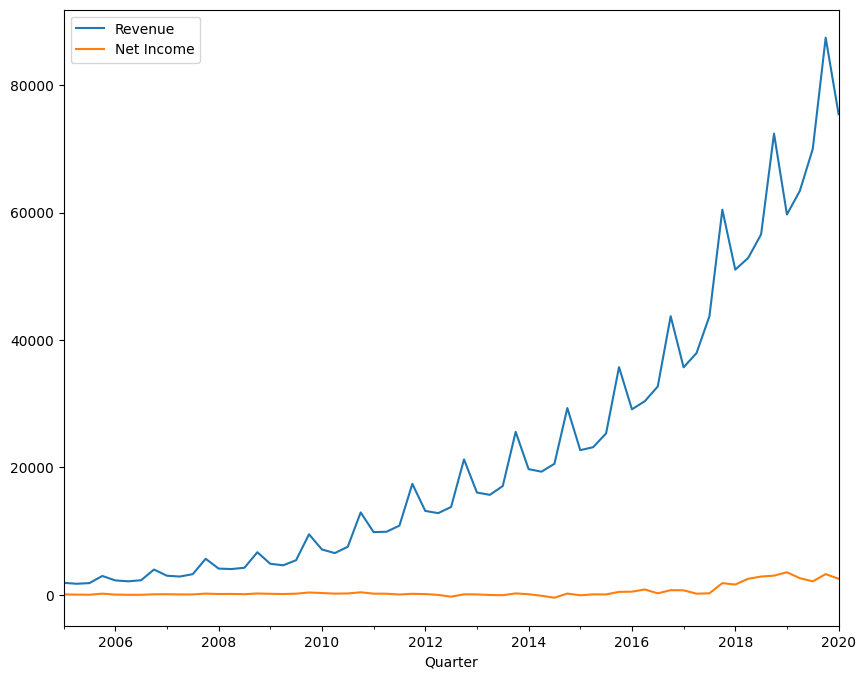

In [ ]:
amazon_df.plot()

Data can be stationary around a mean or it can be stationary around a trend line

NUll Hypothesis - Data is stationary
 Alternate Hypothesis - Data is not stationary

In [ ]:
# Performing the Kwiatkowski-Phillips-Schmidt-Shin (KPSS) and adfuller tests on time series data.
# The KPSS test is often used to assess whether a time series is stationary or non-stationary.
from statsmodels.tsa.stattools import kpss

In [ ]:
tsttest=kpss(amazon_df['Revenue'], 'ct') # ct indicates data is stationary around a trend

<ipython-input-12-c5b8ccfd3a76>:1: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




In [ ]:
tsttest

(0.30665545975169417,
 0.01,
 4,
 {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})

This is the actual test statistic calculated by the KPSS test. In this case, the test statistic is approximately 0.3067. So it's above critical value and thus rejects null hypothesis.

(0.30665545975169417,

---
P value

---


0.01<0.05 so it rejects null hypothesis. It means the data is not stationary around a constant mean.


---
Lag order

---


4, represents the number of lags in the data used to calculate the test statistic.

---


{'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}) Critical Values

Null Hypothesis - Series possesses a unit root and hence is not stationary

---
Alternate Hypothesis - Series is stationary


In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['Revenue'])

In [ ]:
print(f'Test Statistics: {result[0]}')
print(f'p.value: {result[1]}')
print(f'Lag order: {result[2]}')

print(f'Critical Value: {result[4]}')

if result[1]>0.05:
  print('Series is not Stationary')
else:
    print('Series is Stationary')



Test Statistics: -2.444836038197226
p.value: 0.12947943121838967
Lag order: 10
Critical Value: {'1%': -3.568485864, '5%': -2.92135992, '10%': -2.5986616}
Series is not Stationary


**Decomposition**
T-- trend, C--cyclic, S-- Seasonality, I-- residual
---
**Additive** y(t) = T(t)+C(t)+S(t)+I(t)

---
used when data is stationary


---
**Multiplicative** y(t) = T(t)* C(t)* S(t)*I(t)

---
used when data is not stationary





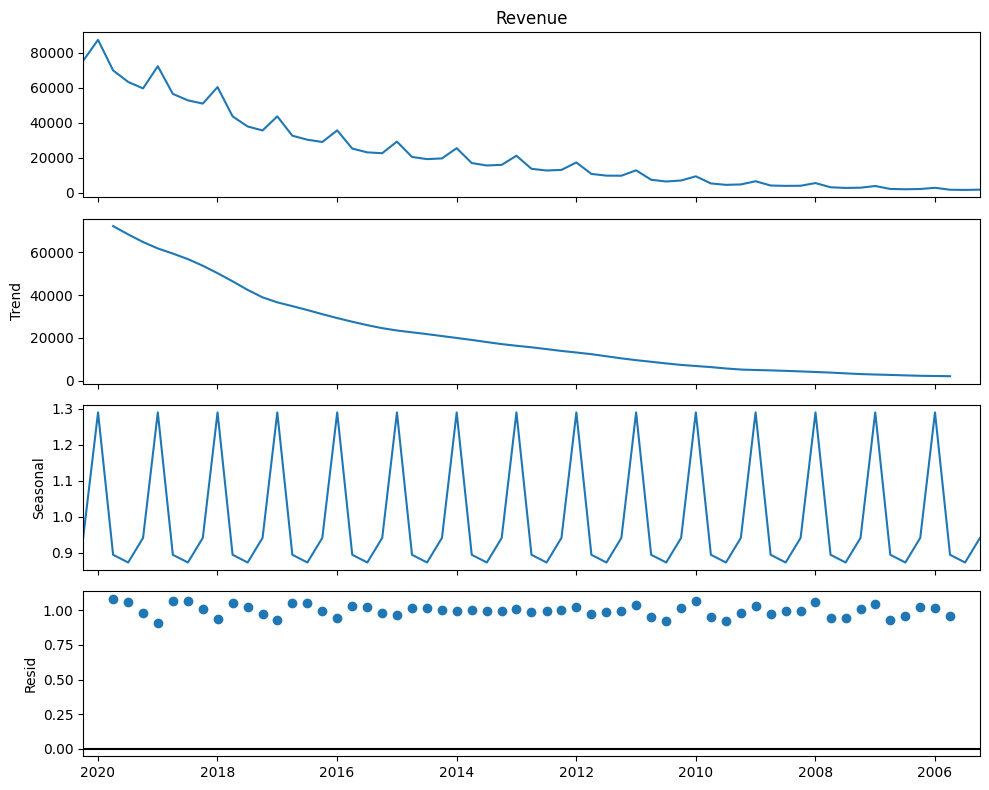

In [ ]:
import statsmodels.api as sm
res = sm.tsa.seasonal_decompose(amazon_df['Revenue'],
                                model = 'multiplicative')
resplot=res.plot()

<Axes: xlabel='Quarter'>

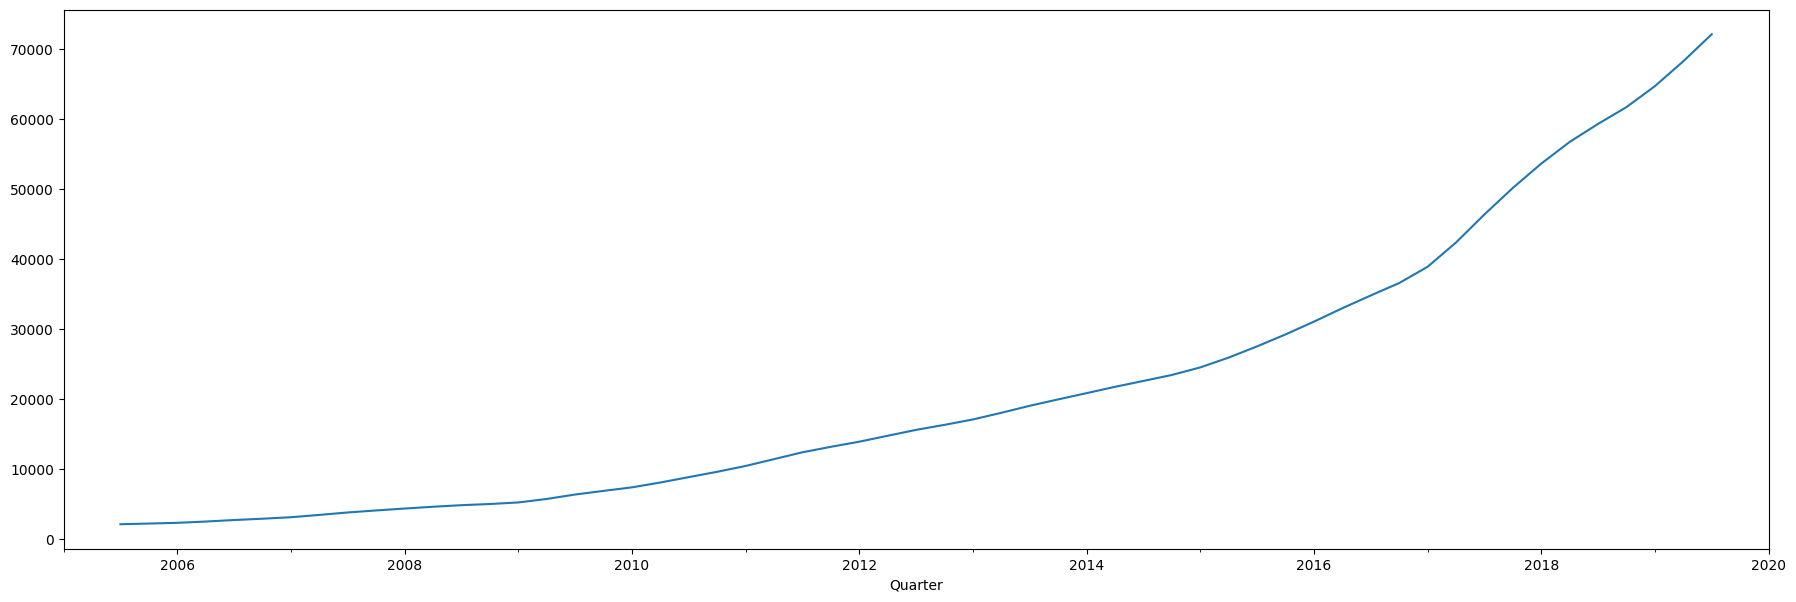

In [ ]:
plt.figure(figsize=(22,7))
res.trend.plot()

In [ ]:
print(res.trend) # here for finding the trend it will perform t, t-1, t-2 type of analysis..So first and last two values will be null

Quarter
2020-03-31          NaN
2019-12-31          NaN
2019-09-30    72099.500
2019-06-30    68248.750
2019-03-31    64691.375
                ...    
2006-03-31     2369.375
2005-12-31     2265.000
2005-09-30     2169.625
2005-06-30          NaN
2005-03-31          NaN
Name: trend, Length: 61, dtype: float64


In [ ]:
res.observed[2]

69981.0

In [ ]:
res.trend[2]*res.seasonal[2]*res.resid[2] # the multiplicative factor is verified

69980.99999999999

<Axes: xlabel='Quarter'>

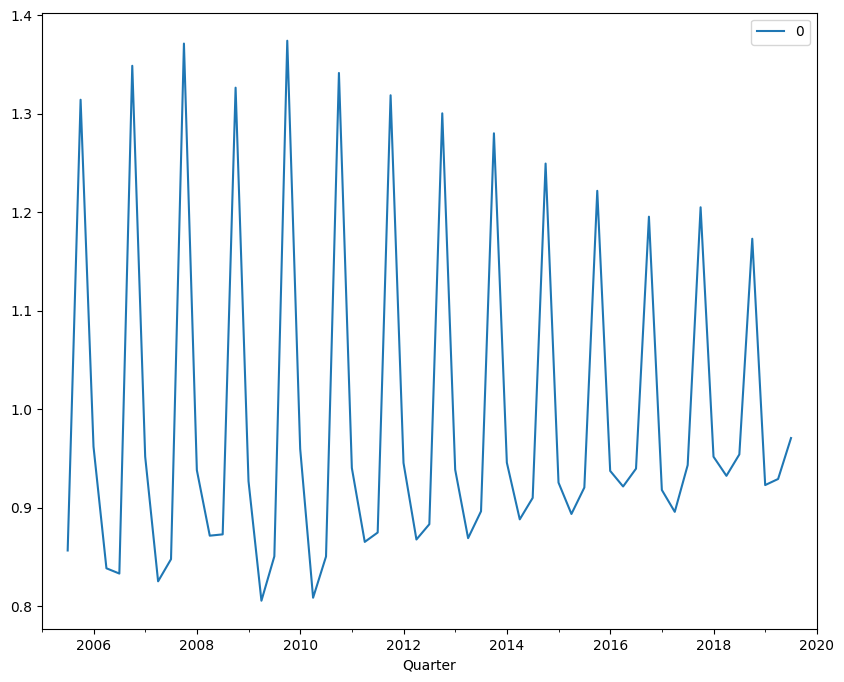

In [ ]:
pd.DataFrame(res.observed/res.trend).plot() # Here the data is detrended so that it becomes stationary and can be applied to train ML model

Here we have determined that there are trend and seasonality in the data. Now we are going to use fbprophet to forecast revenue in the future. We are going to introduce holiday effect in our model to increase the prediction accuracy of our prophet model.

In [ ]:
from prophet import Prophet

In [ ]:
amazon_df = df[['Quarter', 'Revenue']].rename({'Quarter': 'ds', 'Revenue': 'y'}, axis ='columns')

In [ ]:
amazon_df

,ds,y
0,2020-03-31,75452
1,2019-12-31,87437
2,2019-09-30,69981
3,2019-06-30,63404
4,2019-03-31,59700
...,...,...
56,2006-03-31,2279
57,2005-12-31,2977
58,2005-09-30,1858
59,2005-06-30,1753


In [ ]:
train = amazon_df[(amazon_df['ds']>= '2005-03-31') & (amazon_df['ds'] <= '2019-03-31' )]
test = amazon_df[(amazon_df['ds'] > '2019-03-31')]

In [ ]:
train.shape

(57, 2)

In [ ]:
test.shape

(4, 2)

In [ ]:
m = Prophet(interval_width = 0.95)

In [ ]:
m.fit(train) # since our data is quarterly, the model is disabling daily and weekly

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8rn_up3g/1_su57v7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8rn_up3g/jbpwsvzh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51969', 'data', 'file=/tmp/tmp8rn_up3g/1_su57v7.json', 'init=/tmp/tmp8rn_up3g/jbpwsvzh.json', 'output', 'file=/tmp/tmp8rn_up3g/prophet_modelgg8yp110/prophet_model-20231028170807.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
17:08:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:08:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = m.make_future_dataframe(periods = 4, freq = 'Q')
future.tail()  # after our train dataframe timestamp it has added four more datapoints

,ds
56,2019-03-31
57,2019-06-30
58,2019-09-30
59,2019-12-31
60,2020-03-31


In [ ]:
forecast_df = m.predict(future)
forecast_df[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
56,2019-03-31,61089.988292,56844.453930,65193.856508
57,2019-06-30,63195.694128,58831.916324,67423.285345
58,2019-09-30,66153.567720,62136.478470,70057.234286
59,2019-12-31,74249.808481,70208.906432,78431.911671
60,2020-03-31,70663.832137,66406.400323,75234.519758


<Axes: xlabel='ds'>

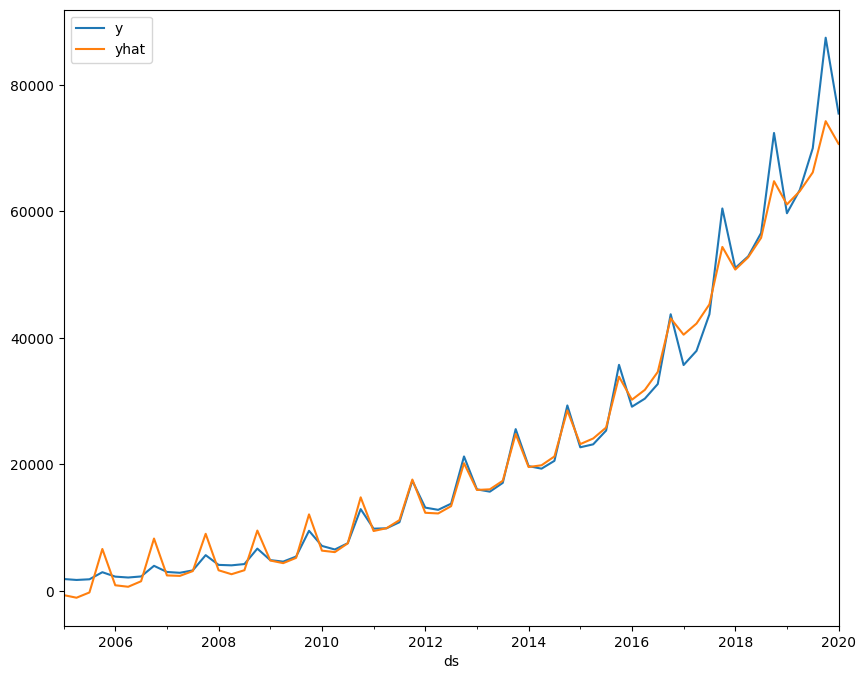

In [ ]:
pd.concat([amazon_df.set_index('ds')['y'], forecast_df.set_index('ds')['yhat']], axis=1).plot()

If we observe the prediction curve, we can see that our prophet model couldn't understand the trend, non-stationarity of the curve. Here, prophet by default is acting as an additive model. But our data has trend and seasonality so it is in multiplicative mode.

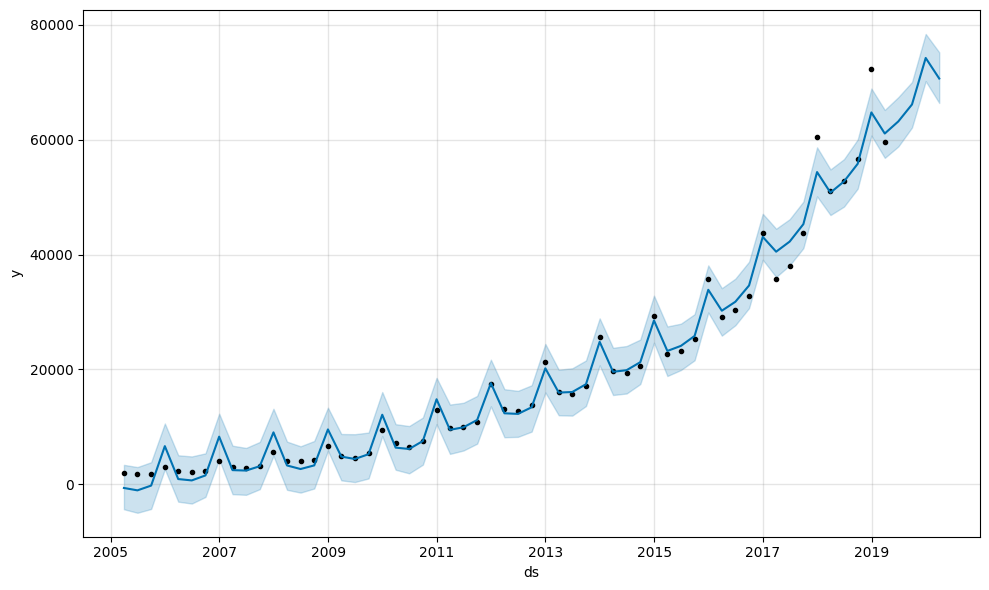

In [ ]:
fig1 = m.plot(forecast_df)

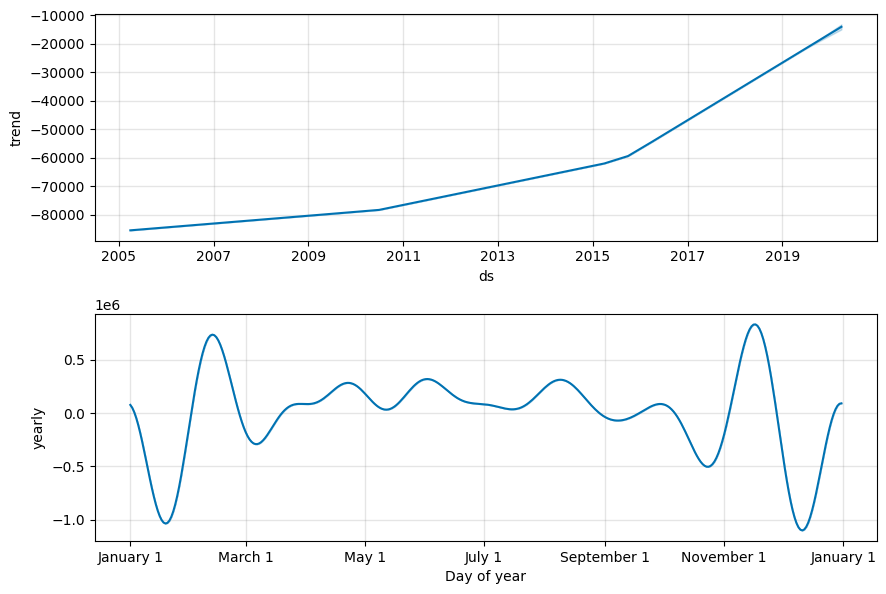

In [ ]:
fig2 = m.plot_components(forecast_df)

In [ ]:
holiday_sale = pd.DataFrame({
    'holiday' : 'dec_jan_sale',

    'ds' : pd.to_datetime(['2019-12-31', '2018-12-31', '2017-12-31', '2016-12-31',
                           '2015-12-31', '2014-12-31', '2013-12-31', '2012-12-31',
                           '2011-12-31', '2010-12-31', '2009-12-31', '2008-12-31',
                           '2007-12-31', '2006-12-31', '2005-12-31']),

    'lower_window':0,
    'upper_window':1,


}

)

In [ ]:
m2 = Prophet(interval_width = 0.95, seasonality_mode = 'multiplicative', holidays = holiday_sale)

In [ ]:
m2.fit(train)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8rn_up3g/i022bvgr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8rn_up3g/gcrizpyk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26918', 'data', 'file=/tmp/tmp8rn_up3g/i022bvgr.json', 'init=/tmp/tmp8rn_up3g/gcrizpyk.json', 'output', 'file=/tmp/tmp8rn_up3g/prophet_modelyvuld4vp/prophet_model-20231028170857.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
17:08:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:08:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
forecast_df = m2.predict(future)
forecast_df[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
56,2019-03-31,60099.583212,58172.217947,61937.101529
57,2019-06-30,62625.602944,60876.185086,64404.205541
58,2019-09-30,67792.307829,66065.524847,69594.567938
59,2019-12-31,89322.131828,87243.855290,91384.031627
60,2020-03-31,66842.199815,64645.804999,68813.124329


<Axes: xlabel='ds'>

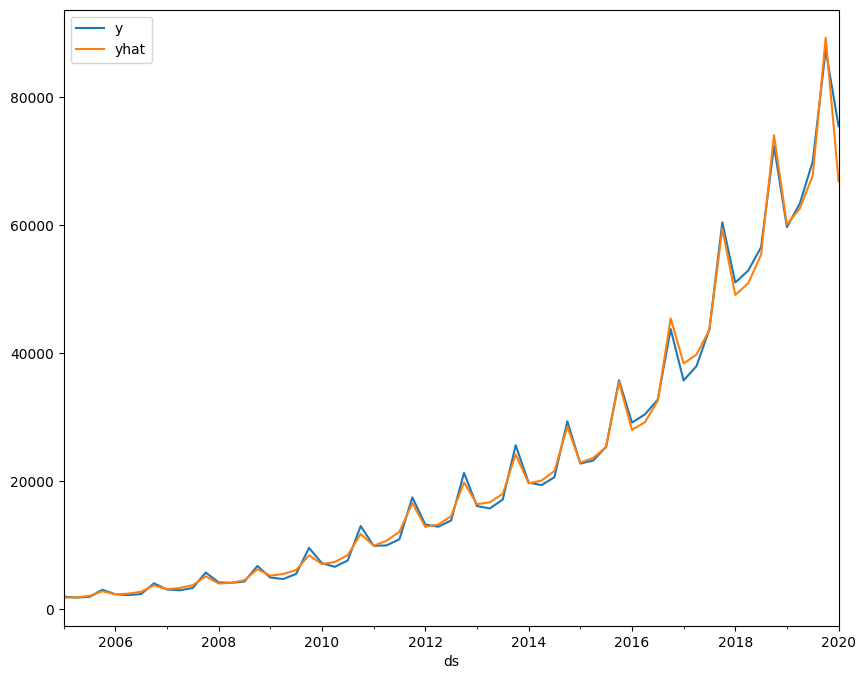

In [ ]:
pd.concat([amazon_df.set_index('ds')['y'], forecast_df.set_index('ds')['yhat']], axis=1).plot()

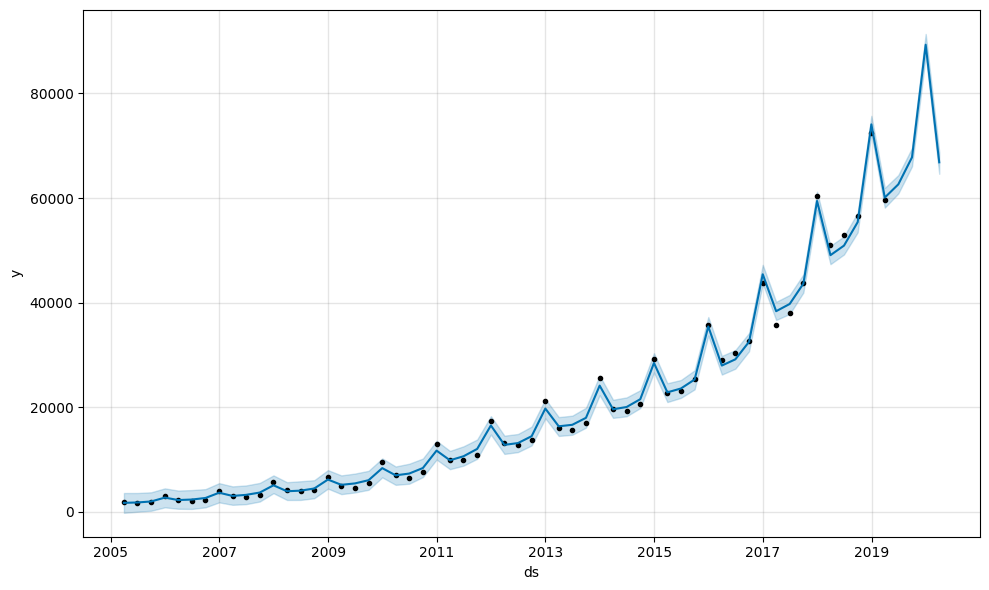

In [ ]:
fig1 = m2.plot(forecast_df)

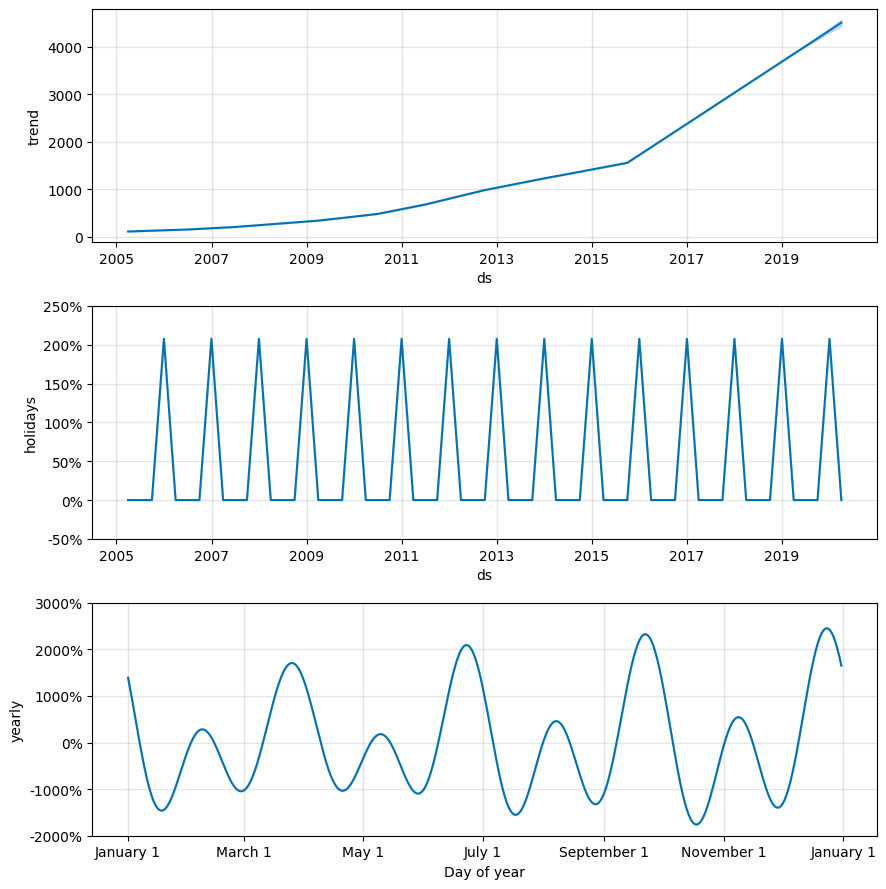

In [ ]:
fig2 = m2.plot_components(forecast_df)

Now we can see that after incorporating holidays, our model can predict the future quite accurately.